In [2]:
import zipfile
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local_zip='/content/drive/MyDrive/Colab Notebooks/DATASETS/Face Emotion Recognition dataset.zip'
zip_ref=zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train=train_datagen.flow_from_directory(
    '/content/Face Emotion Recognition/train',
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=20
)

validate=val_datagen.flow_from_directory(
    '/content/Face Emotion Recognition/validation',
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=20
)

train.class_indices,validate.class_indices

Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


({'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4},
 {'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4})

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                        

In [ ]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history=model.fit(
    train,
    epochs=30,
    validation_data=validate,
    verbose=1
)

Epoch 1/30
1215/1215 [==============================] - 75s 47ms/step - loss: 1.9178 - accuracy: 0.3018 - val_loss: 1.5010 - val_accuracy: 0.3301
Epoch 2/30
1215/1215 [==============================] - 57s 47ms/step - loss: 1.3260 - accuracy: 0.4388 - val_loss: 1.2516 - val_accuracy: 0.4696
Epoch 3/30
1215/1215 [==============================] - 56s 46ms/step - loss: 1.1258 - accuracy: 0.5456 - val_loss: 1.2049 - val_accuracy: 0.5272
Epoch 4/30
1215/1215 [==============================] - 55s 46ms/step - loss: 1.0410 - accuracy: 0.5906 - val_loss: 1.0109 - val_accuracy: 0.5934
Epoch 5/30
1215/1215 [==============================] - 55s 46ms/step - loss: 0.9644 - accuracy: 0.6249 - val_loss: 0.9403 - val_accuracy: 0.6387
Epoch 6/30
1215/1215 [==============================] - 55s 46ms/step - loss: 0.9111 - accuracy: 0.6506 - val_loss: 1.0673 - val_accuracy: 0.5723
Epoch 7/30
1215/1215 [==============================] - 56s 46ms/step - loss: 0.8637 - accuracy: 0.6654 - val_loss: 1.0901 -

Text(0.5, 1.0, 'Training and validation loss')

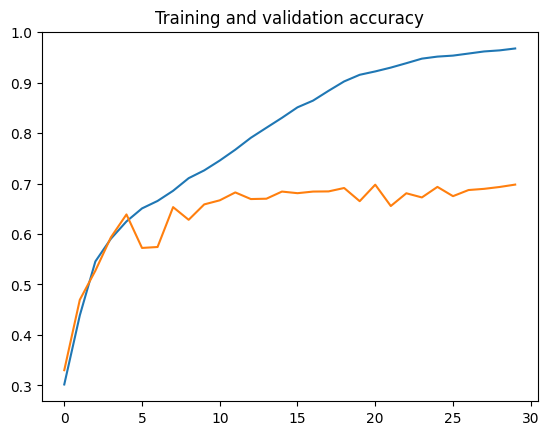

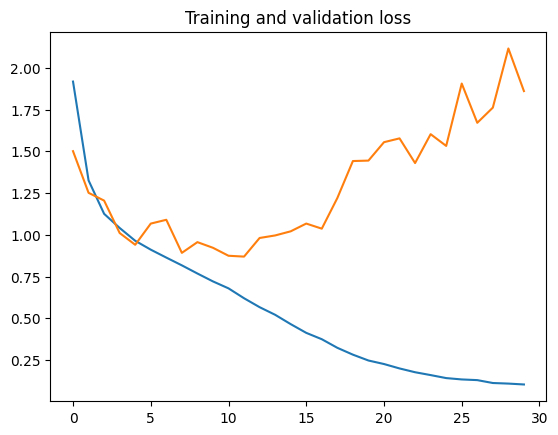

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [7]:
import pickle
with open('/content/drive/MyDrive/face_emotion_model','rb') as f:
  model=pickle.load(f)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving happy human1.jpg to happy human1.jpg


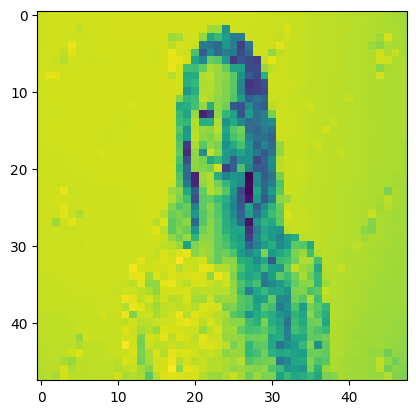

In [9]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded=files.upload()
path=""
for fn in uploaded.keys():
  path=fn

import cv2
img=cv2.imread(path,0)
img=cv2.resize(img,(48,48))
plt.imshow(img)

In [10]:
import numpy as np

img_2d=np.array(img)
img_2d=img_2d/255.0
img_2d=img_2d.reshape(-1,48,48)
pred=model.predict(img_2d)
pred=np.round_(pred)
pred=pred.reshape(5)

dict={0:'Angry', 1:'Happy', 2:'Neutral', 3:'Sad', 4:'Surprise'}

result=0
for i in pred:
  if i==1 :
    print("Person is in",dict[result], "mood.")
    break
  result+=1

1/1 [==============================] - 8s 8s/step
Person is in Neutral mood.
